Here, we compute different logratio transformations of sing-cell seq data and save them to be used in a different place. We also visualise the PCA after each log-transformation.

ref: https://www.annualreviews.org/doi/full/10.1146/annurev-statistics-042720-124436

In [137]:
import scanpy as sc
adata = sc.read('mymethod/cells_raw.h5ad')

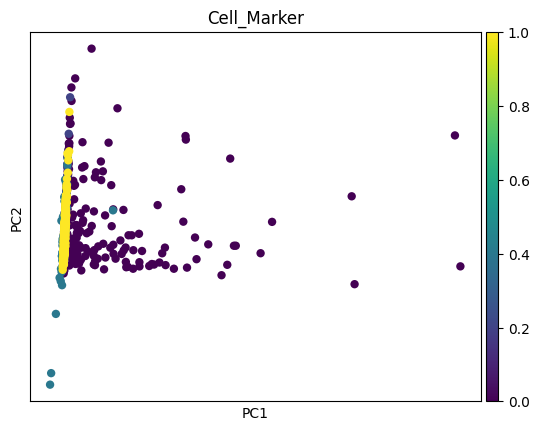

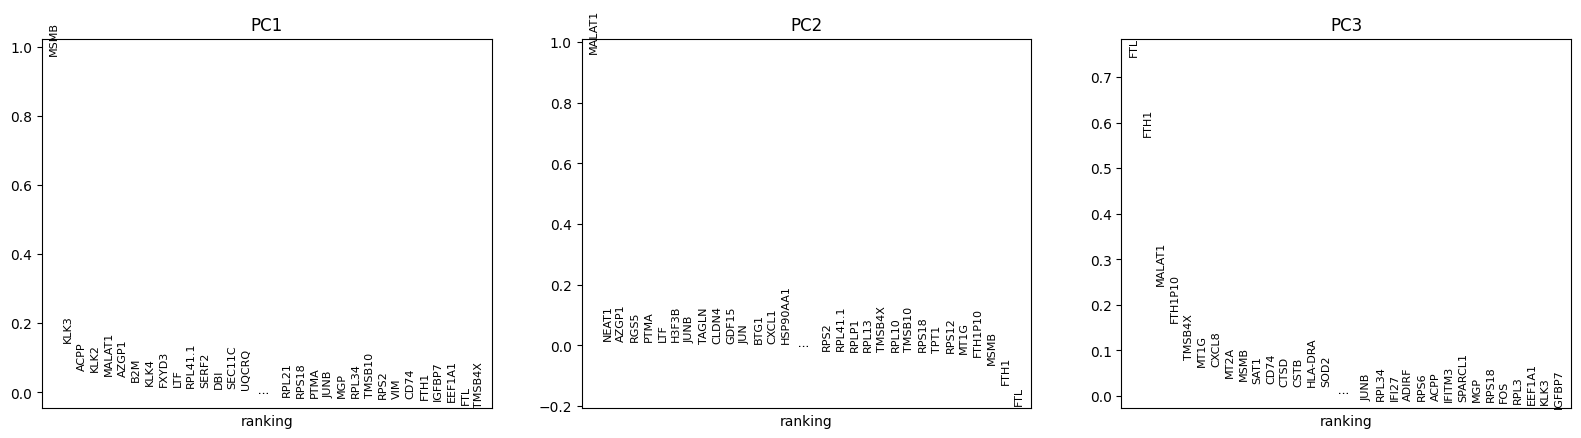

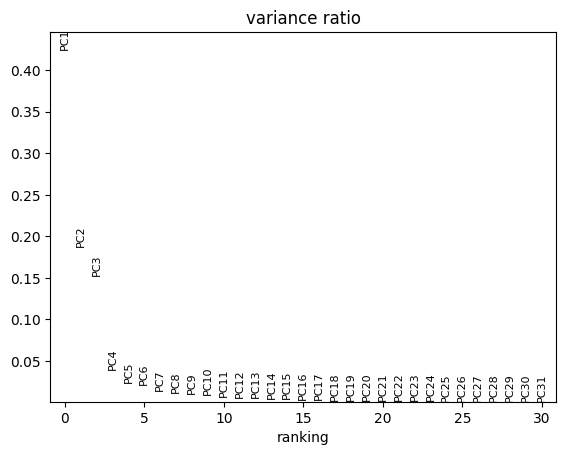

In [138]:
adata_cpm = adata.copy() # make a copy so we can compare results
adata_cpm.raw = adata_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_total(adata_cpm, target_sum=1, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata_cpm) # run pca
sc.pl.pca_overview(adata_cpm, color='Cell_Marker') # plot pca

For a $J$-part composition $[x_1, x_2,…, x_J]$, the simplest such subset is that of the additive logratios (ALRs), where a specific reference part is contrasted with all the other parts (here, the last part is chosen as reference in the denominator):  
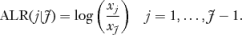

In [146]:
import numpy as np
#cells x genes
adata = sc.read('mymethod/cells_raw.h5ad')
adata_ALR = adata.copy() # make a copy so we can compare results
adata_ALR.raw = adata_ALR # store a copy of the raw values before normalizing
sc.pp.normalize_total(adata_ALR, target_sum=1, exclude_highly_expressed=True) # normalize
n_C,n_G = adata_ALR.X.shape
for cell in range(0,n_C):
    adata_ALR.X[cell,0:-2]=adata_ALR.X[cell,0:-2]/(adata_ALR.X[cell,-1]+1)

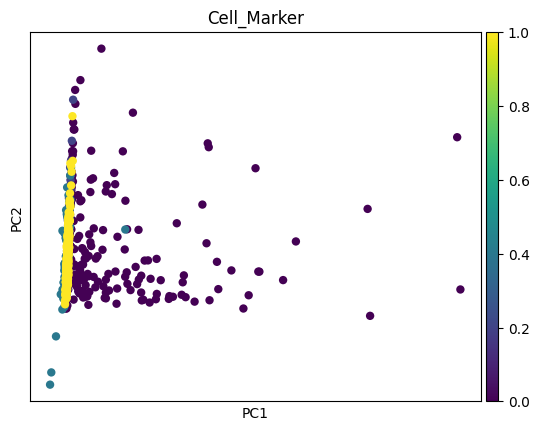

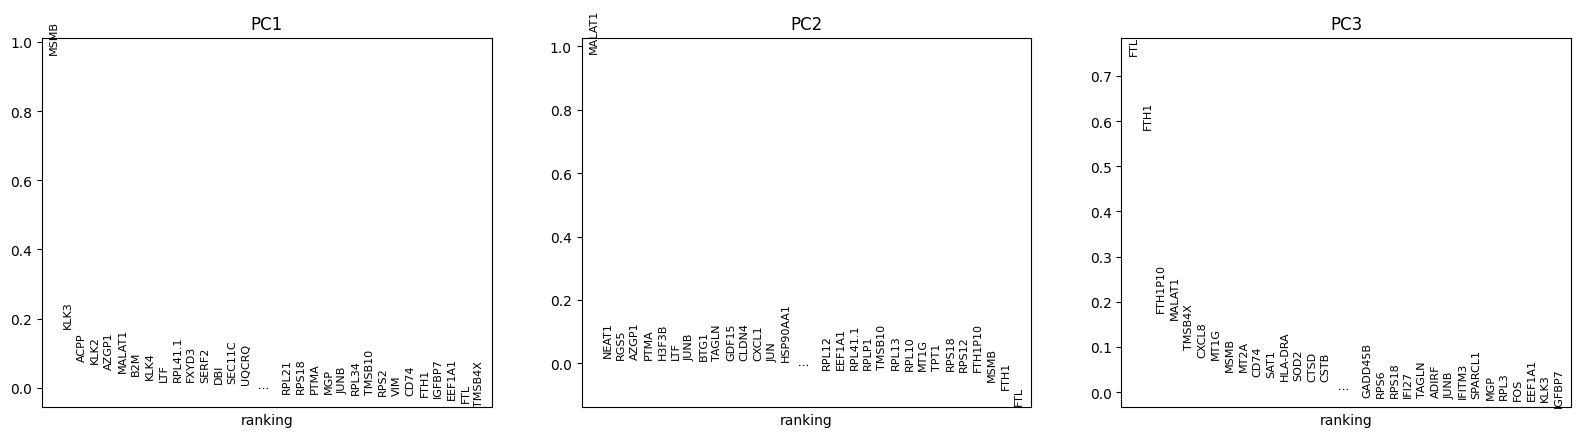

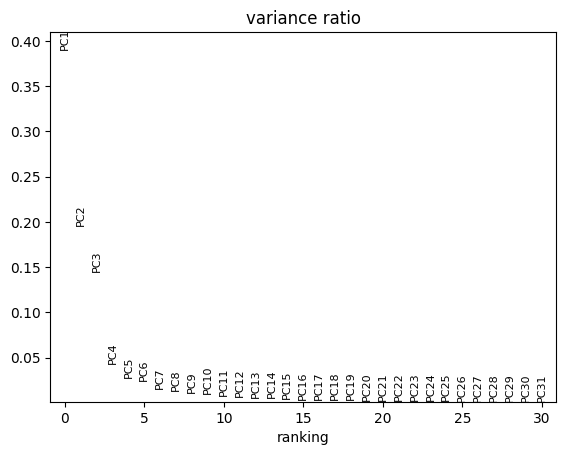

In [147]:
sc.pp.log1p(adata_ALR)
sc.pp.pca(adata_ALR)
sc.pl.pca_overview(adata_ALR, color='Cell_Marker')
adata_cpm.write('mymethod/cells_ARL.h5ad')

the centered logratio (CLR) transformation (Aitchison 1986). A CLR is the logratio between a part and the geometric mean of all J parts in the composition. There are thus J CLRs, defined as: 
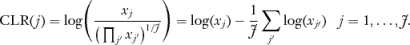

In [141]:
import numpy as np
#cells x genes
adata = sc.read('mymethod/cells_raw.h5ad')
adata_CLR = adata.copy() # make a copy so we can compare results
adata_CLR.raw = adata_CLR # store a copy of the raw values before normalizing
sc.pp.normalize_total(adata_CLR, target_sum=1, exclude_highly_expressed=True) # normalize
n_C,n_G = adata_CLR.X.shape
for cell in range(0,n_C):
    adata_CLR.X[cell,:]=adata_CLR.X[cell,:]/(np.prod(adata_CLR.X[cell,:])+1)

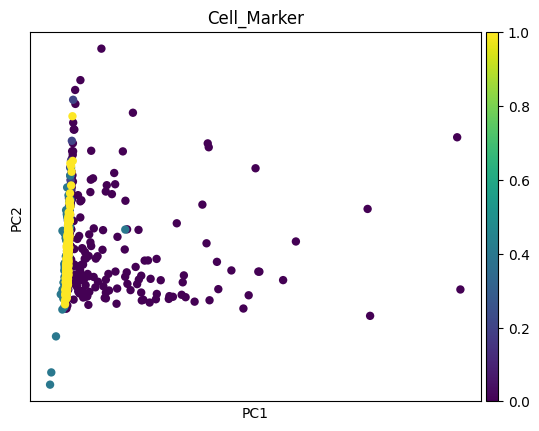

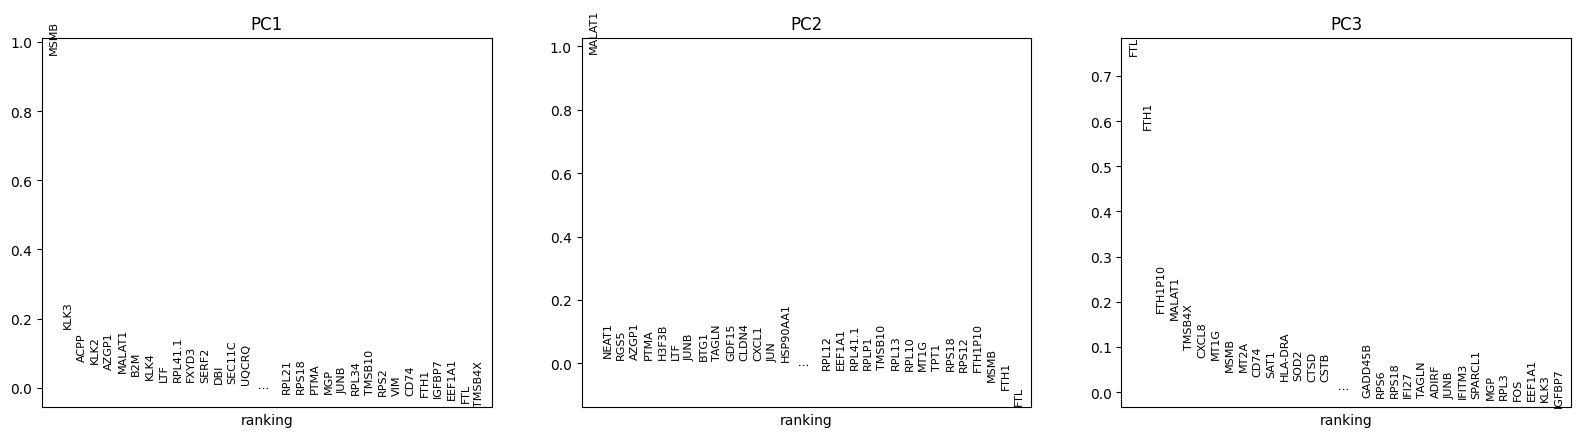

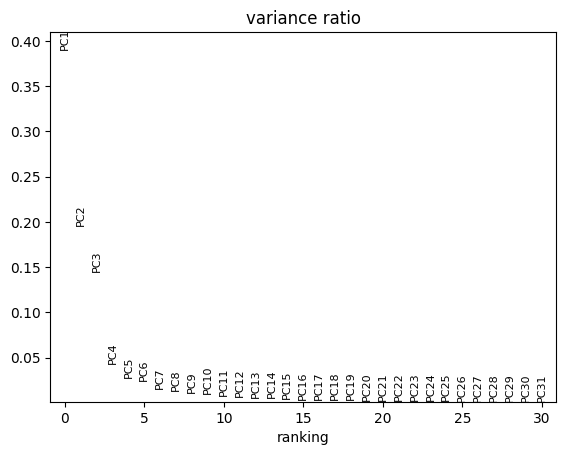

In [142]:
sc.pp.log1p(adata_CLR)
sc.pp.pca(adata_CLR)
sc.pl.pca_overview(adata_CLR,color='Cell_Marker')
adata_CLR.write('mymethod/cells_CLR.h5ad')

log scaling $\log(X+1)$ without computing ratios

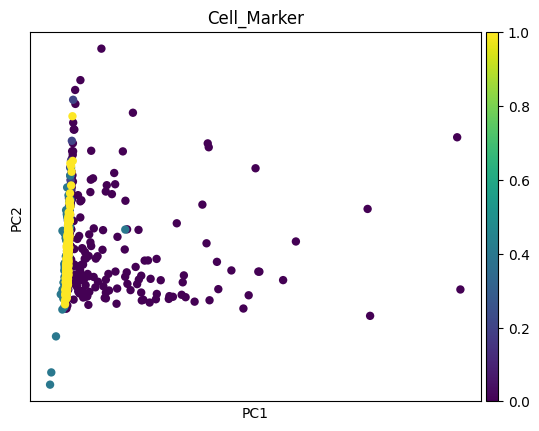

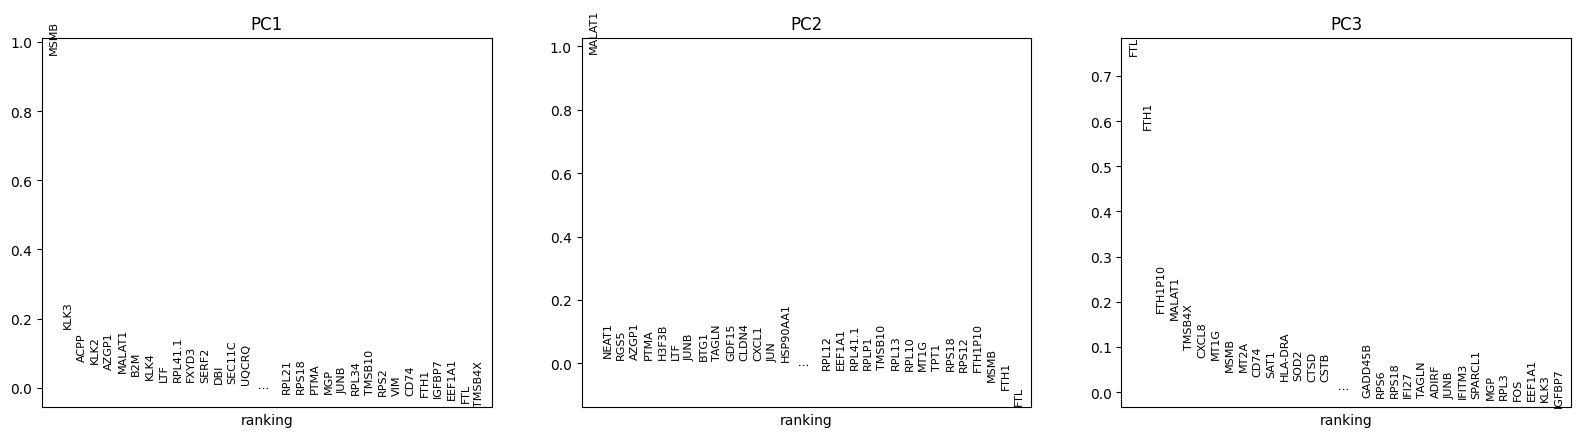

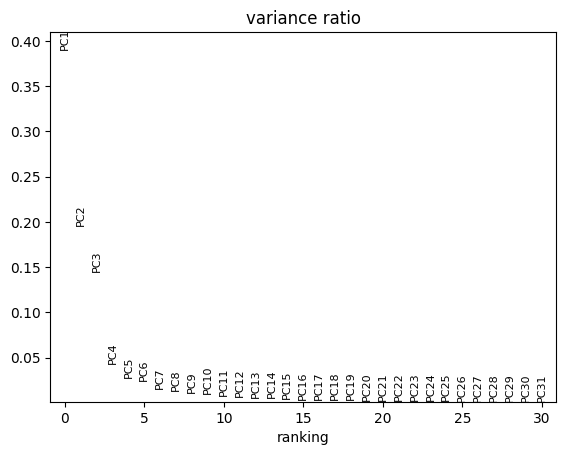

In [144]:
adata = sc.read('mymethod/cells_raw.h5ad')
adata_cpm = adata.copy() # make a copy so we can compare results
adata_cpm.raw = adata_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_total(adata_cpm, target_sum=1, exclude_highly_expressed=True) # normalize
sc.pp.log1p(adata_cpm)
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='Cell_Marker')
adata_cpm.write('mymethod/cells_log.h5ad')

log scaling $\log(X+1)$ without computing ratios plus Scale data to unit variance and zero mean.

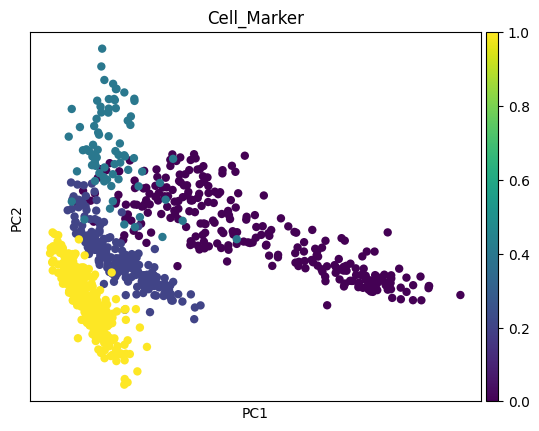

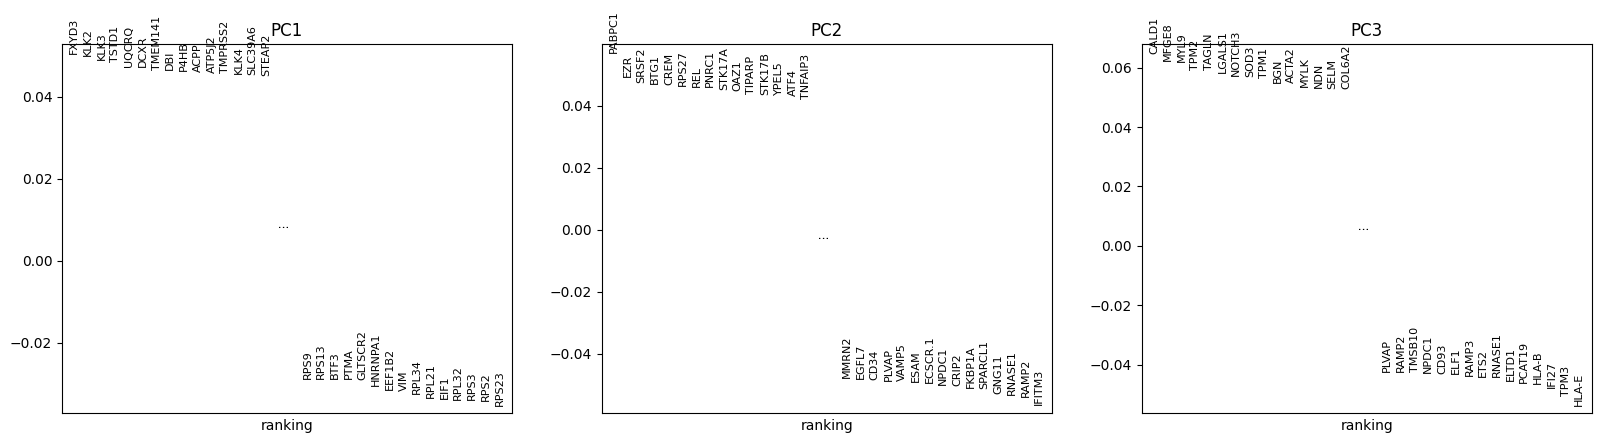

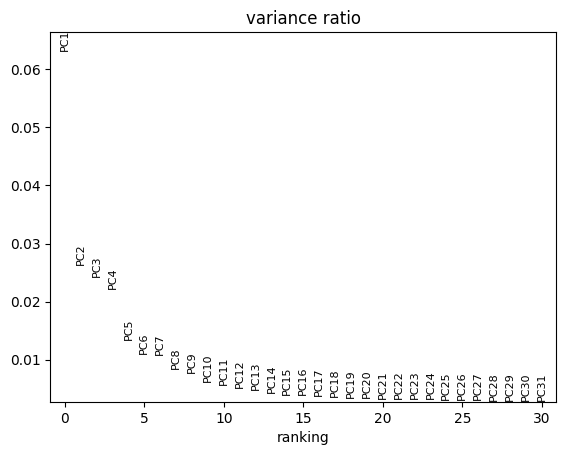

In [145]:
adata = sc.read('mymethod/cells_raw.h5ad')
adata_cpm = adata.copy() # make a copy so we can compare results
adata_cpm.raw = adata_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_total(adata_cpm, target_sum=1, exclude_highly_expressed=True) # normalize
sc.pp.log1p(adata_cpm)
sc.pp.scale(adata_cpm)
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='Cell_Marker')
adata_cpm.write('mymethod/cells_lognorm.h5ad')